In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/ML_Miniproject2/drug200.csv'

df = pd.read_csv(file_path)


In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df = df.sample(frac=1, random_state=4)

split_idx = int(0.8 * len(df))

x_train = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].iloc[:split_idx]
x_test = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].iloc[split_idx:]

y_train = df['Drug'].iloc[:split_idx]
y_test = df['Drug'].iloc[split_idx:]

print(x_train.shape)
print(x_test.shape)

(160, 5)
(40, 5)


In [ ]:
import numpy as np
import pandas as pd

def train_test_split_df(dataframe, target_column, test_size=0.2, shuffle=False, random_state=None):
    if shuffle:
        dataframe = dataframe.sample(frac=1, random_state=random_state).reset_index(drop=True)

    split_idx = int(len(dataframe) * (1 - test_size))

    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]

    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    return X_train, X_test, y_train, y_test


In [ ]:
data = df.sample(frac=1, random_state=4).to_numpy()

split_idx = int(0.8 * len(data))

x_train = data[:split_idx, :-1]
x_test = data[split_idx:, :-1]
y_train = data[:split_idx, -1]
y_test = data[split_idx:, -1]

print(x_train.shape)
print(x_test.shape)

(160, 5)
(40, 5)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
target = 'Drug'

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=4)

for train_index, test_index in sss.split(df[features], df[target]):
    x_train, x_test = df[features].iloc[train_index], df[features].iloc[test_index]
    y_train, y_test = df[target].iloc[train_index], df[target].iloc[test_index]

print(x_train.shape)
print(x_test.shape)


(160, 5)
(40, 5)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


X_gender = pd.get_dummies(df['Sex'], prefix='Sex')
X_BP = pd.get_dummies(df['BP'], prefix='BP')
X_chol = pd.get_dummies(df['Cholesterol'], prefix='Chol')

X_other = df.drop(['Sex', 'Drug', 'BP', 'Cholesterol'], axis=1)

X = pd.concat([X_gender, X_other, X_BP, X_chol], axis=1).values

y = pd.get_dummies(df['Drug']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2, shuffle=True)

print(X_train.shape)
print(X_test.shape)


(160, 9)
(40, 9)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_drug = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_sex = LabelEncoder()

df['Drug'] = le_drug.fit_transform(df['Drug'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Sex'] = le_sex.fit_transform(df['Sex'])

x_train, x_test, y_train, y_test = train_test_split(
    df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']],
    df['Drug'],
    test_size=0.2,
    random_state=4,
    shuffle=True
)

print(x_train.shape)
print(x_test.shape)

(160, 5)
(40, 5)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         2
           3       0.86      0.92      0.89        13
           4       0.95      1.00      0.98        20

    accuracy                           0.90        40
   macro avg       0.71      0.68      0.68        40
weighted avg       0.86      0.90      0.87        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


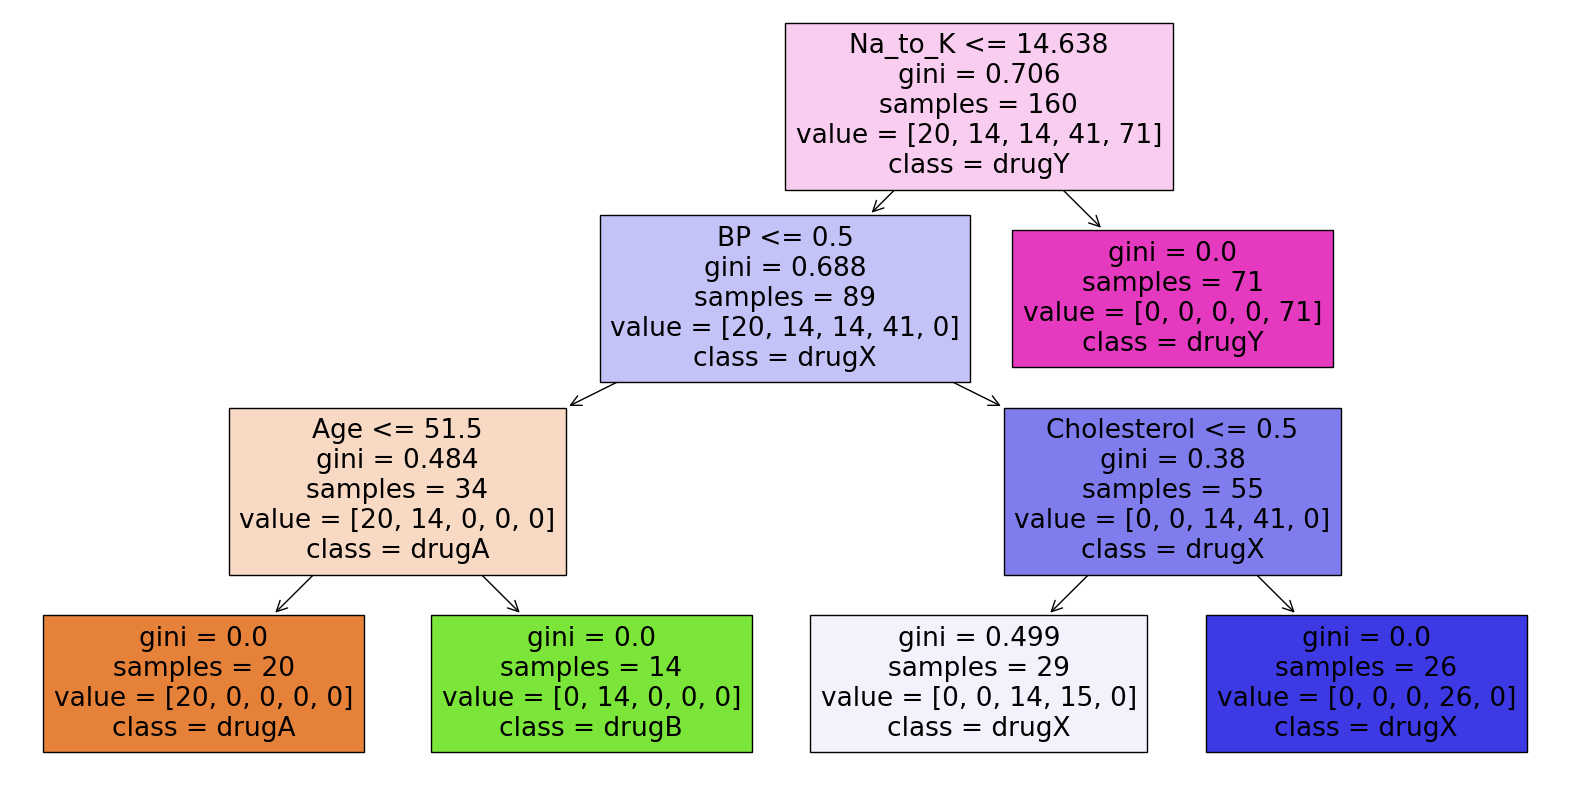

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names=le_drug.classes_)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

class Node:
    """Class to represent a node in the decision tree."""
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_tree(data, labels, depth=0, max_depth=3):
    """Builds the decision tree recursively."""
    num_samples, num_features = data.shape
    if num_samples == 0:
        return None
    if len(set(labels.tolist())) == 1 or depth == max_depth:
        return Node(value=most_common_label(labels))

    best_feature, best_threshold = best_split(data, labels)

    if best_feature is None:
        return Node(value=most_common_label(labels))

    left_idxs = data[:, best_feature] < best_threshold
    right_idxs = data[:, best_feature] >= best_threshold

    left = build_tree(data[left_idxs], labels[left_idxs], depth+1, max_depth)
    right = build_tree(data[right_idxs], labels[right_idxs], depth+1, max_depth)

    return Node(best_feature, best_threshold, left, right)

def most_common_label(labels):
    return max(set(labels.tolist()), key=list(labels).count)

def best_split(data, labels):
    num_samples, num_features = data.shape
    best_gini = 1.0
    best_feature, best_threshold = None, None

    for feature_index in range(num_features):
        thresholds = set(data[:, feature_index])
        for threshold in thresholds:
            gini = calculate_gini(data, labels, feature_index, threshold)
            if gini < best_gini:
                best_gini, best_feature, best_threshold = gini, feature_index, threshold

    return best_feature, best_threshold

def calculate_gini(data, labels, feature_index, threshold):
    left_labels = labels[data[:, feature_index] < threshold]
    right_labels = labels[data[:, feature_index] >= threshold]
    left_gini = 1.0 - sum([(left_labels == v).mean()**2 for v in set(left_labels.tolist())])
    right_gini = 1.0 - sum([(right_labels == v).mean()**2 for v in set(right_labels.tolist())])
    left_weight = len(left_labels) / len(labels)
    right_weight = len(right_labels) / len(labels)
    return left_gini * left_weight + right_gini * right_weight

def predict(node, sample):
    """Predict a label for a single sample using the decision tree."""
    if node.value is not None:
        return node.value
    if sample[node.feature_index] < node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

def accuracy_score(y_true, y_pred):
    correct = sum(y1 == y2 for y1, y2 in zip(y_true, y_pred))
    return correct / len(y_true)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le_drug = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_sex = LabelEncoder()

df['Drug'] = le_drug.fit_transform(df['Drug'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Sex'] = le_sex.fit_transform(df['Sex'])

x_train, x_test, y_train, y_test = train_test_split(df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']], df['Drug'], test_size=0.2, random_state=4, shuffle=True)

x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

tree = build_tree(x_train_np, y_train_np)
y_pred = [predict(tree, sample) for sample in x_test_np]

accuracy = accuracy_score(y_test_np, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


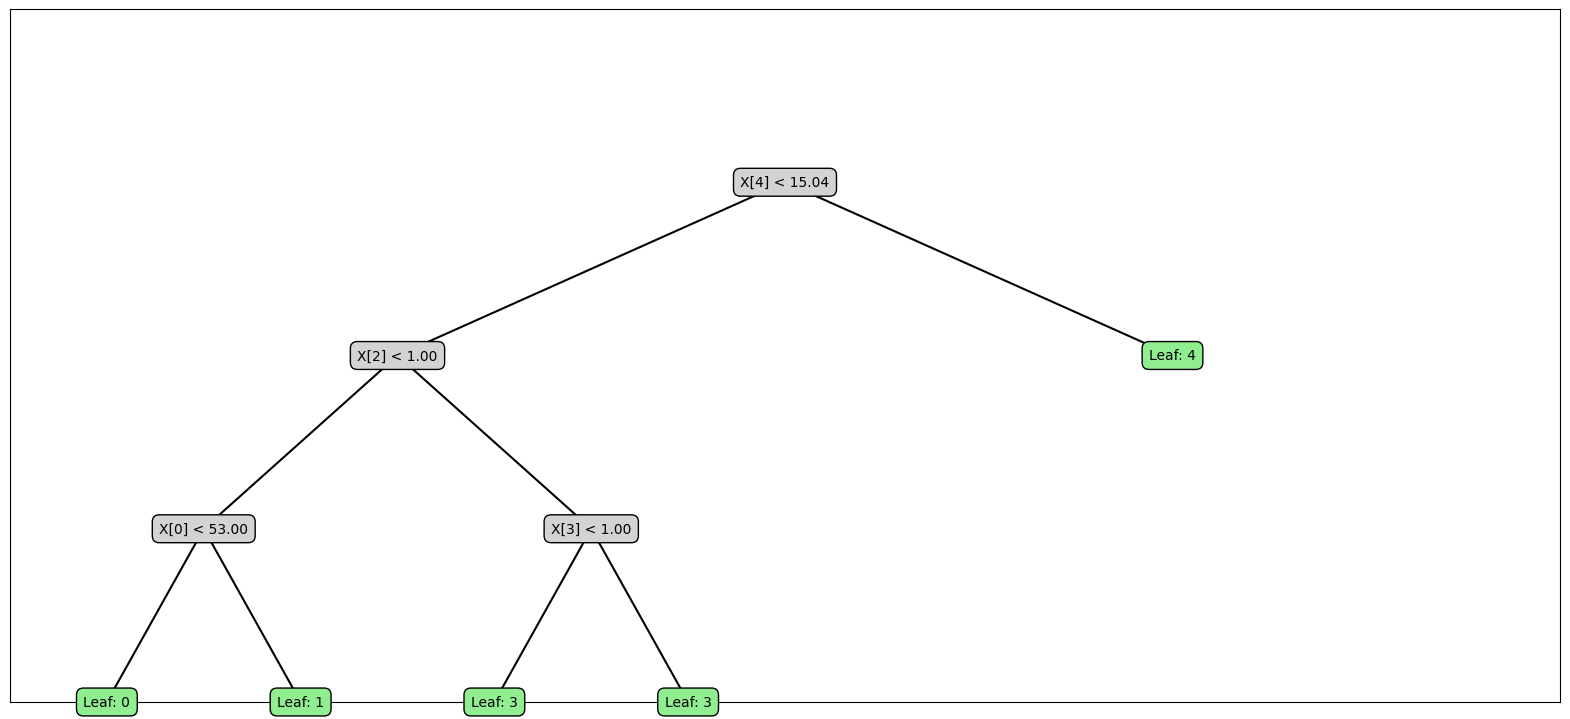

In [ ]:
import matplotlib.pyplot as plt

def plot_node(node, x, y, dx, dy, ax):
    """Recursively plot a decision tree node."""
    if node.threshold is not None:
        ax.text(x, y, f'X[{node.feature_index}] < {node.threshold:.2f}',
                horizontalalignment='center', verticalalignment='center',
                bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'))

        left_x, left_y = x - dx, y - dy
        right_x, right_y = x + dx, y - dy
        ax.plot([x, left_x], [y, left_y], "k-")
        ax.plot([x, right_x], [y, right_y], "k-")

        plot_node(node.left, left_x, left_y, dx / 2, dy, ax)
        plot_node(node.right, right_x, right_y, dx / 2, dy, ax)
    else:
        ax.text(x, y, f'Leaf: {node.value}',
                horizontalalignment='center', verticalalignment='center',
                bbox=dict(facecolor='lightgreen', edgecolor='black', boxstyle='round,pad=0.5'))

def calculate_depth(node):
    """Calculate the depth of the tree."""
    if node is None or node.value is not None:
        return 0
    return 1 + max(calculate_depth(node.left), calculate_depth(node.right))

def plot_tree(root):
    """Plot the entire tree."""
    depth = calculate_depth(root)
    fig, ax = plt.subplots(figsize=(20, depth * 3))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-depth, 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plot_node(root, 0, 0, 0.5, 1, ax)
    plt.show()

plot_tree(tree)


# Q2-2

In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Precision Score (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall Score (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy Score: 0.9
Hamming Loss: 0.1
Precision Score (macro): 0.7125
Recall Score (macro): 0.6900000000000001
F1 Score (macro): 0.6789440444612859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


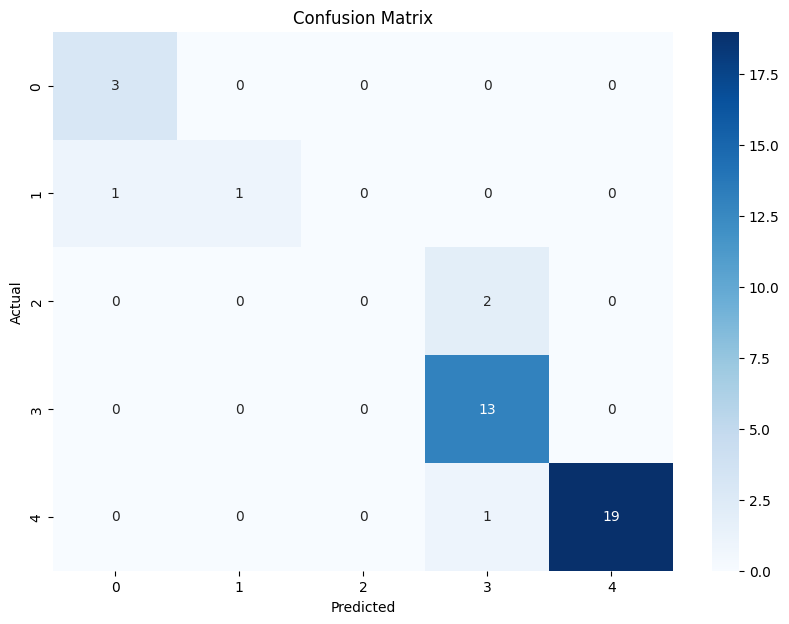

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

y_test_labels = le_drug.inverse_transform(y_test)
y_pred_labels = le_drug.inverse_transform(y_pred)

cm_labels = confusion_matrix(y_test_labels, y_pred_labels, labels=le_drug.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_labels, annot=True, fmt="d", cmap='Blues', xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, make_scorer
import time

max_depth_values = [3, 5, 7, 10]
min_samples_leaf_values = [1, 5, 10, 20]

f1_scorer = make_scorer(f1_score, average='weighted')

results = []

for max_depth, min_samples_leaf in [(d, l) for d in max_depth_values for l in min_samples_leaf_values]:
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

    start_time = time.time()

    scores = cross_val_score(model, x_train, y_train, cv=5, scoring=f1_scorer)
    mean_f1_score = np.mean(scores)

    end_time = time.time()

    runtime = end_time - start_time

    results.append({
        'max_depth': max_depth,
        'min_samples_leaf': min_samples_leaf,
        'mean_f1_score': mean_f1_score,
        'runtime': runtime
    })

results_df = pd.DataFrame(results)

print(results_df)


    max_depth  min_samples_leaf  mean_f1_score   runtime
0           3                 1       0.870081  0.036437
1           3                 5       0.870081  0.032688
2           3                10       0.870081  0.039604
3           3                20       0.750309  0.035311
4           5                 1       1.000000  0.033853
5           5                 5       1.000000  0.034720
6           5                10       1.000000  0.032800
7           5                20       0.750309  0.039748
8           7                 1       1.000000  0.032864
9           7                 5       1.000000  0.036705
10          7                10       1.000000  0.032009
11          7                20       0.750309  0.038044
12         10                 1       1.000000  0.034949
13         10                 5       1.000000  0.033467
14         10                10       1.000000  0.038080
15         10                20       0.750309  0.032789


# Q2-3

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(n_estimators=12, max_depth=10, random_state=4)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        20

    accuracy                           0.97        40
   macro avg       0.95      0.90      0.90        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, make_scorer
import time
n_estimators = [3,5, 10, 30, 100]
learning_rate = [ 0.1, 0.05, 0.01]

f1_scorer = make_scorer(f1_score, average='weighted')
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_depth=4)
results = []

for ne in n_estimators:
    for lr in learning_rate:
        model =  AdaBoostClassifier(estimator=weak_learner, n_estimators=ne, learning_rate=lr)

        start_time = time.time()

        scores = cross_val_score(model, x_train, y_train, cv=5, scoring=f1_scorer)
        mean_f1_score = np.mean(scores)

        end_time = time.time()

        runtime = end_time - start_time

        results.append({
            'n_estimators': ne,
            'learning_rate': lr,
            'mean_f1_score': mean_f1_score,
            'runtime': runtime
        })

results_df = pd.DataFrame(results)

print(results_df)


    n_estimators  learning_rate  mean_f1_score   runtime
0              3           0.10            1.0  0.052096
1              3           0.05            1.0  0.042915
2              3           0.01            1.0  0.043041
3              5           0.10            1.0  0.061624
4              5           0.05            1.0  0.048191
5              5           0.01            1.0  0.047810
6             10           0.10            1.0  0.044437
7             10           0.05            1.0  0.044629
8             10           0.01            1.0  0.055737
9             30           0.10            1.0  0.047787
10            30           0.05            1.0  0.057851
11            30           0.01            1.0  0.047629
12           100           0.10            1.0  0.049968
13           100           0.05            1.0  0.056535
14           100           0.01            1.0  0.045439


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(
    df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']],
    df['Drug'],
    test_size=0.2,
    random_state=4
)

print(x_train.shape)
print(x_test.shape)

model = AdaBoostClassifier(random_state=4)

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=3, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


(160, 5)
(40, 5)
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Test Accuracy: 0.875
